<a href="https://colab.research.google.com/github/Tony6512/Numerical-Analysis-Algorithms/blob/main/Numerical_Analysis_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Analysis Algorithms

Various algorithms from numerical analysis text Numerical Analysis Mathematics of Scientific Computing by Kincaid and Cheney and Numerical Linear Algebra by Trefethen and Bau.

In [ ]:
import random
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tqdm import tqdm
import sklearn
import sklearn.preprocessing

## Solution to Nonlinear Equations

Here are algorithms for find the solution to a nonlienar equation via root finding.

In [ ]:
def bisectionMethod(f, a, b, M_iters = 100, delta = 10**(-7), epsilon = 10**(-7)):
  left, right = a, b
  if left >= right:
    raise ValueError(f'{a} should be less than {b}.')
  if sign(f(left)) == sign(f(right)):
    raise ValueError(f'The function must have different sign at endpoints.')
  for _ in range(M_iters):
    mid = (left + right) / 2
    u, v, w = f(left), f(right), f(mid)
    if abs(w) < epsilon or abs(mid) < delta:
      return mid
    elif sign(u) == sign(w):
      left = mid
    else:
      right = mid
  raise Exception('Method Failed: Reach Max Iteration Value')


def sign(a):
  if a > 0:
    return 1
  elif a < 0:
    return -1
  return 0

In [ ]:
def function(x):
  return math.exp(x) - math.sin(x)
a, b = -4, -3
bisectionMethod(function, a,b)

-3.18306303024292

In [ ]:
scipy.optimize.bisect(function, a,b)

-3.1830630119347916

In [ ]:
def NewtonsMethod(f, df, start, M_iters = 100, delta = 10**(-7), epsilon = 10**(-7)):
  x_curr = start
  u, v = f(x_curr), df(x_curr)
  for _ in range(M_iters):
    x_next = x_curr - u / v
    u, v = f(x_next), df(x_next)
    if abs(x_next - x_curr) < delta or abs(u) < epsilon:
      return x_next
    x_curr = x_next
  raise Exception('Method Failed: Reach Max Iteration Value')

In [ ]:
def function(x):
  return math.exp(x) - math.sin(x)
def derivative(x):
  return math.exp(x) - math.cos(x)
start = -4
NewtonsMethod(f = function, df = derivative, start = start)

-3.183063011933351

In [ ]:
scipy.optimize.newton(function, start, fprime = derivative)

-3.1830630119333634

In [ ]:
def SecantMethod(f, x0, x1, M_iters = 100, delta = 10**(-7), epsilon = 10**(-7)):
  x_past = x0
  x_curr = x1
  u = f(x_curr)
  v = f(x_past)
  for _ in range(M_iters):
    x_next = x_curr - u * (x_curr - x_past) / (u - v)
    u, v = f(x_next), f(x_curr)
    if abs(x_next - x_curr) < delta or abs(u) < epsilon:
      return x_next
    x_past = x_curr
    x_curr = x_next
  raise Exception('Method Failed: Reach Max Iteration Value')

In [ ]:
def function(x):
  return math.exp(x) - math.sin(x)
x0 = -4
x1 = -3
SecantMethod(f = function, x0 = x0, x1= x1)

-3.1830629517061877

In [ ]:
scipy.optimize.newton(function, x0,x1 =  x1)

-3.1830630119333634

In [ ]:
scipy.optimize.brentq(function, x0, x1)

-3.1830630119334606

In [ ]:
poly = np.polynomial.Polynomial.fromroots([-5,-1,3])
print(poly)

-15.0 - 13.0·x + 3.0·x² + 1.0·x³


In [ ]:
scipy.optimize.brentq(poly, 2, 4)

3.0

## Solving Systems of Linear Equations

In [ ]:
def lu(A):
    m, n = A.shape
    if m != n:
        raise ValueError( 'A is not a square matrix')
    L = np.zeros_like(A)
    U = np.zeros_like(A)
    for k in range(m):
        L[k,k] = 1.0
        U[k,k] = A[k,k] - L[k,:k].dot(U[:k,k])
        for r in range(k+1, m):
            U[k,r] = A[k,r] - L[k,:k].dot(U[:k,r])
            L[r,k] = (A[r,k] - L[r,:k].dot(U[:k,k])) / U[k,k]
    return L, U

In [ ]:
def lu(A):
  ## LU factorization: Doolittle's Factorization
  ## combine L and U into one matrix
  m, n = A.shape
  if m != n:
    raise ValueError( 'A is not a square matrix')
  LU = np.zeros_like(A)
  # LU = np.zeros(A.shape)
  for k in range(m):
    LU[k,k] = A[k,k] - LU[k,:k].dot(LU[:k,k])
    for r in range(k+1, m):
      LU[k,r] = A[k,r] - LU[k,:k].dot(LU[:k,r]) ## upper
      LU[r,k] = (A[r,k] - LU[r,:k].dot(LU[:k,k])) / LU[k,k] ## lower
  return LU

In [ ]:
A = np.array([[2,1,0,3],[4,1,-1,5],[1,2,1,0],[2,2,4,3]], dtype=np.float64)

lu(A)

array([[  2. ,   1. ,   0. ,   3. ],
       [  2. ,  -1. ,  -1. ,  -1. ],
       [  0.5,  -1.5,  -0.5,  -3. ],
       [  1. ,  -1. ,  -6. , -19. ]])

In [ ]:
# scipy.linalg.lu(A)

In [ ]:
def lu_solve(LU, b):
  m, n = LU.shape
  if m != n:
    raise ValueError( 'A is not a square matrix')
  y = np.zeros((m, 1))
  x = np.zeros_like(y)
  for i in range(m):
    y[i] = b[i] - LU[i,:i].dot(y[0:i])
  for i in reversed(range(m)):
    x[i] = (y[i] - LU[i,i+1:].dot(x[i+1:])) / LU[i,i]
  return x

In [ ]:
A = np.array([[2,1,0,3],[4,1,-1,5],[1,2,1,0],[2,2,4,3]],dtype=np.float64)
print(A)
b = np.array([1,-1,2,4],dtype=np.float64)
b.shape = (4, 1)
print(b)
LU = lu(A)
print(LU)
lu_solve(LU, b)

[[ 2.  1.  0.  3.]
 [ 4.  1. -1.  5.]
 [ 1.  2.  1.  0.]
 [ 2.  2.  4.  3.]]
[[ 1.]
 [-1.]
 [ 2.]
 [ 4.]]
[[  2.    1.    0.    3. ]
 [  2.   -1.   -1.   -1. ]
 [  0.5  -1.5  -0.5  -3. ]
 [  1.   -1.   -6.  -19. ]]


array([[-1.78947368],
       [ 1.73684211],
       [ 0.31578947],
       [ 0.94736842]])

In [ ]:
scipy.linalg.solve(A,b)

array([[-1.78947368],
       [ 1.73684211],
       [ 0.31578947],
       [ 0.94736842]])

### Decompositions

In [ ]:
A = np.array([[2,1,0,3],[4,1,-1,5],[1,2,1,0],[2,2,4,3]])

In [ ]:
U, s, VT = scipy.linalg.svd(A)
print(U)
print(s)
print(VT.T)

[[-0.42405884 -0.16095779 -0.0209814  -0.8909694 ]
 [-0.70625215 -0.55362844 -0.0573564   0.43750851]
 [-0.15540102  0.32433158 -0.93234448  0.03732718]
 [-0.54519035  0.74993144  0.35637592  0.11561364]]
[8.64416292 4.31304451 1.60475692 0.31756853]
[[-0.56904388 -0.16513506 -0.30595352  0.74519254]
 [-0.29285586  0.33246581 -0.76664253 -0.46471621]
 [-0.18855617  0.89906     0.34305233  0.19609383]
 [-0.74489669 -0.23213793  0.44829317 -0.43620424]]


In [ ]:
m,n = A.shape
sigma = scipy.linalg.diagsvd(s,m,n)
print(sigma)

[[8.64416292 0.         0.         0.        ]
 [0.         4.31304451 0.         0.        ]
 [0.         0.         1.60475692 0.        ]
 [0.         0.         0.         0.31756853]]


In [ ]:
P, L, U = scipy.linalg.lu(A)
print(P)
print(L)
print(U)

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[1.         0.         0.         0.        ]
 [0.25       1.         0.         0.        ]
 [0.5        0.85714286 1.         0.        ]
 [0.5        0.28571429 0.04166667 1.        ]]
[[ 4.          1.         -1.          5.        ]
 [ 0.          1.75        1.25       -1.25      ]
 [ 0.          0.          3.42857143  1.57142857]
 [ 0.          0.          0.          0.79166667]]


In [ ]:
Q, R = scipy.linalg.qr(A)
print(Q)
print(R)

[[-0.4         0.01942572 -0.17823721 -0.89880706]
 [-0.8        -0.4467915  -0.14186227  0.37450294]
 [-0.2         0.73817726 -0.60382403  0.22470177]
 [-0.4         0.50506865  0.76387377  0.03745029]]
[[-5.         -2.4        -1.         -6.4       ]
 [ 0.          2.05912603  3.20524335 -0.66047439]
 [ 0.          0.          2.59353332  1.04759831]
 [ 0.          0.          0.         -0.71155559]]


In [ ]:
T, Z = scipy.linalg.schur(A)
print(T)
print(Z)

[[ 8.00472429  1.85398844  1.39619239 -2.07174655]
 [ 0.         -0.34834682  0.10725867  0.58315601]
 [ 0.          0.         -0.32818873 -1.52979237]
 [ 0.          0.          4.38372304 -0.32818873]]
[[-0.4101284  -0.83408282 -0.30339568 -0.20988475]
 [-0.63487017  0.3870415   0.22883164 -0.62831108]
 [-0.2398194  -0.28525493  0.84853366  0.37564201]
 [-0.60927926  0.27043364 -0.36820887  0.64812549]]


## Numerical Linear Algebra

In [ ]:
def GE(A):
  ## aka LU factorization
  m = A.shape[0]
  U = A.copy()
  L = np.eye(m)
  for k in range(m-1):
    for j in range(k+1, m):
      L[j,k] = U[j,k] / U[k,k]
      U[j, k:m] = U[j, k:m] - L[j,k]*U[k, k:m]
  return L, U

def GE_P(A):
  ## with partial pivoting
  m = A.shape[0]
  U = A.copy()
  L = np.eye(m)
  P = np.eye(m)
  for k in range(m-1):
    i = np.argmax(abs(U[k:m,k])) + k
    ## swap rows
    U[[k,i], k:m] = U[[i,k], k:m]
    L[[k, i], 0:k-1]  = L[[i,k], 0:k-1]
    P[[k,i]] = P[[i,k]]
    for j in range(k+1, m):
      L[j,k] = U[j,k] / U[k,k]
      U[j, k:m] = U[j, k:m] - L[j,k]*U[k, k:m]
  return P, L, U

In [ ]:
A = np.array([[2,1,0,3],[4,1,-1,5],[1,2,1,0],[2,2,4,3]], dtype=np.float64)
L, U = GE(A)
print(L)
print(U)
print(L.dot(U))

[[ 1.   0.   0.   0. ]
 [ 2.   1.   0.   0. ]
 [ 0.5 -1.5  1.   0. ]
 [ 1.  -1.  -6.   1. ]]
[[  2.    1.    0.    3. ]
 [  0.   -1.   -1.   -1. ]
 [  0.    0.   -0.5  -3. ]
 [  0.    0.    0.  -19. ]]
[[ 2.  1.  0.  3.]
 [ 4.  1. -1.  5.]
 [ 1.  2.  1.  0.]
 [ 2.  2.  4.  3.]]


In [ ]:
A = np.array([[2,1,0,3],[4,1,-1,5],[1,2,1,0],[2,2,4,3]], dtype=np.float64)
P, L, U = GE_P(A)
print(P)
print(L)
print(U)
# print(P.dot(L.dot(U)))

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
[[0.         1.         0.         0.        ]
 [0.5        0.         0.         0.        ]
 [0.5        0.28571429 1.         0.        ]
 [0.25       0.85714286 0.04166667 1.        ]]
[[ 4.          1.         -1.          5.        ]
 [ 0.          1.75        1.25       -1.25      ]
 [ 0.          0.          3.42857143  1.57142857]
 [ 0.          0.          0.          0.79166667]]


In [ ]:
scipy.linalg.lu(A)

(array([[0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]),
 array([[1.        , 0.        , 0.        , 0.        ],
        [0.25      , 1.        , 0.        , 0.        ],
        [0.5       , 0.85714286, 1.        , 0.        ],
        [0.5       , 0.28571429, 0.04166667, 1.        ]]),
 array([[ 4.        ,  1.        , -1.        ,  5.        ],
        [ 0.        ,  1.75      ,  1.25      , -1.25      ],
        [ 0.        ,  0.        ,  3.42857143,  1.57142857],
        [ 0.        ,  0.        ,  0.        ,  0.79166667]]))

In [ ]:
def GE_solve(A, b):
  L, U = GE(A)
  y = scipy.linalg.solve(L, b)
  return scipy.linalg.solve(U, y)

In [ ]:
A = np.array([[2,1,0,3],[4,1,-1,5],[1,2,1,0],[2,2,4,3]], dtype=np.float64)
b = np.array([1,-1,2,4],dtype=np.float64)
b.shape = (4, 1)
GE_solve(A, b)

array([[-1.78947368],
       [ 1.73684211],
       [ 0.31578947],
       [ 0.94736842]])

In [ ]:
A = np.array([[2,1,0,3],[4,1,-1,5],[1,2,1,0],[2,2,4,3]], dtype=np.float64)
b = np.array([1,-1,2,4],dtype=np.float64)
b.shape = (4, 1)
scipy.linalg.solve(A,b)

array([[-1.78947368],
       [ 1.73684211],
       [ 0.31578947],
       [ 0.94736842]])

In [ ]:
def qrFactorization(A):
  '''
  Use modied Gram-Schmidt here. An alternate is to use Householder triangularization
  '''
  n = A.shape[0]
  V = A.copy()
  R = np.zeros(A.shape)
  Q = np.zeros(A.shape)
  for i in range(n):
    R[i][i] = scipy.linalg.norm(V[:,i])
    Q[:,i] = V[:,i] / R[i][i]
    for j in range(i+1, n):
      R[i][j] = Q[:,i].dot(V[:,j])
      V[:,j] = V[:,j] - R[i,j] * Q[:,i]
  return Q, R

  n = A.shape[0]
  V = A.copy()
  R = np.zeros(A.shape)
  Q = np.zeros(A.shape)
  for i in range(n):
    R[i][i] = scipy.linalg.norm(V[:,i])
    Q[:,i] = V[:,i] / R[i][i]
    for j in range(i+1, n):
      R[i][j] = Q[:,i].dot(V[:,j])
      V[:,j] = V[:,j] - R[i,j] * Q[:,i]
  return Q, R

In [ ]:
A = np.array([[2,1,0,3],[4,1,-1,5],[1,2,1,0],[2,2,4,3]], dtype=np.float64)
Q, R = qrFactorization(A)
print(Q)
print(R)
print(Q.dot(R))

[[ 0.4         0.01942572 -0.17823721  0.89880706]
 [ 0.8        -0.4467915  -0.14186227 -0.37450294]
 [ 0.2         0.73817726 -0.60382403 -0.22470177]
 [ 0.4         0.50506865  0.76387377 -0.03745029]]
[[ 5.          2.4         1.          6.4       ]
 [ 0.          2.05912603  3.20524335 -0.66047439]
 [ 0.          0.          2.59353332  1.04759831]
 [ 0.          0.          0.          0.71155559]]
[[ 2.00000000e+00  1.00000000e+00 -1.53185205e-17  3.00000000e+00]
 [ 4.00000000e+00  1.00000000e+00 -1.00000000e+00  5.00000000e+00]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00 -3.18585298e-17]
 [ 2.00000000e+00  2.00000000e+00  4.00000000e+00  3.00000000e+00]]


### Eigenvalue Solvers

Note that a polynomial can be converted to a matrix (companion matrix). Thus, finding the roots to a polynomial can be done by finding the eigenvalues to the companion matrix.

In [ ]:
poly = np.polynomial.Polynomial.fromroots([-5,-1,3])
print(poly)

-15.0 - 13.0·x + 3.0·x² + 1.0·x³


In [ ]:
coefs = [1,3,-13,-15]
companion_matrix = scipy.linalg.companion(coefs)
print(companion_matrix)

[[-3. 13. 15.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]


In [ ]:
def HessenbergForm(A):
  m = A.shape[0]
  for k in range(m-2):
    x = A[k+1:m, k]
    e1 = np.zeros_like(x)
    e1[0] = 1
    v = sign(x[0]) *scipy.linalg.norm(x) * e1 + x
    v = v / scipy.linalg.norm(v)
    v = v.reshape((-1,1))
    A[k+1:m, k:m] = A[k+1:m, k:m] - 2 * v.dot(v.T.dot(A[k+1:m, k:m]))
    A[0:m, k+1:m] = A[0:m, k+1:m] - 2 * (A[0:m, k+1:m].dot(v)).dot(v.T)
  return A

def sign(x):
  if x > 0:
    return 1
  elif x < 0:
    return -1
  return 0

In [ ]:
A = np.array([[2,1,0,3],[4,1,-1,5],[1,2,1,0],[2,2,4,3]], dtype=np.float64)
H = HessenbergForm(A)
print(H)

[[ 2.00000000e+00 -2.18217890e+00 -1.85421014e+00  1.34164079e+00]
 [-4.58257569e+00  4.61904762e+00  3.79066762e+00 -1.56144012e+00]
 [-2.22044605e-16  2.44902683e+00  5.80952381e-01  3.62241698e+00]
 [-4.44089210e-16 -4.44089210e-16 -1.83303028e+00 -2.00000000e-01]]


In [ ]:
def householder_reflection(a):
    v = a.copy()
    v[0] += np.sign(a[0]) * np.linalg.norm(a)
    v /= np.linalg.norm(v)
    return np.eye(len(a)) - 2 * np.outer(v, v)
    # return np.eye(len(a)) - 2 * v.dot(v.T)

def hessenberg_reduction(A):
    A = A.copy()
    n = A.shape[0]
    for k in range(n - 2):
        x = A[k + 1:n, k]
        H = householder_reflection(x)
        A[k + 1:n, k:n] = H.dot(A[k + 1:n, k:n])
        A[:, k + 1:n] = A[:, k + 1:n].dot(H)
    return A

In [ ]:
A = np.array([[2,1,0,3],[4,1,-1,5],[1,2,1,0],[2,2,4,3]], dtype=np.float64)
H = hessenberg_reduction(A)
print(H)

[[ 2.00000000e+00 -2.18217890e+00 -1.85421014e+00  1.34164079e+00]
 [-4.58257569e+00  4.61904762e+00  3.79066762e+00 -1.56144012e+00]
 [-8.32667268e-17  2.44902683e+00  5.80952381e-01  3.62241698e+00]
 [-2.22044605e-16  6.00986976e-16 -1.83303028e+00 -2.00000000e-01]]


In [ ]:
A = np.array([[2,1,0,3],[4,1,-1,5],[1,2,1,0],[2,2,4,3]], dtype=np.float64)
scipy.linalg.hessenberg(A)

array([[ 2.        , -2.1821789 , -1.85421014,  1.34164079],
       [-4.58257569,  4.61904762,  3.79066762, -1.56144012],
       [ 0.        ,  2.44902683,  0.58095238,  3.62241698],
       [ 0.        ,  0.        , -1.83303028, -0.2       ]])

In [ ]:
def powerMethod(A, shift = 0, M_iters = 100, tol = 10 ** (-7)):
  """
  calculates eigenpair with largest eigenvalue
  """
  v = np.ones((A.shape[0],1))
  v = v / scipy.linalg.norm(v)
  ew = 0
  I = np.eye(A.shape[0], A.shape[1])
  for _ in range(M_iters):
    ew_prev = ew
    w = (A - shift * I).dot(v)
    v = w / scipy.linalg.norm(w)
    ew = v.T.dot(A.dot(v))
    if abs(ew - ew_prev) < tol:
      return ew, v
  raise Exception('Method Failed: Reached Max Iteration Value')

In [ ]:
A = np.array([[2,1,0,3],[4,1,-1,5],[1,2,1,0],[2,2,4,3]], dtype=np.float64)
powerMethod(A)

(array([[8.00472418]]),
 array([[0.41012841],
        [0.6348702 ],
        [0.23981939],
        [0.60927922]]))

In [ ]:
powerMethod(A, shift = 1)

(array([[8.00472422]]),
 array([[0.41012841],
        [0.63487019],
        [0.23981941],
        [0.60927923]]))

In [ ]:
ew, ev = scipy.linalg.eig(A)
print(ew)
print(ev)

[ 8.00472429+0.j         -0.34834682+0.j         -0.32818873+2.58963049j
 -0.32818873-2.58963049j]
[[-0.4101284 +0.j         -0.72540068+0.j         -0.27171   -0.01282954j
  -0.27171   +0.01282954j]
 [-0.63487017+0.j          0.51541005+0.j         -0.63661547+0.j
  -0.63661547-0.j        ]
 [-0.2398194 +0.j         -0.226514  +0.j          0.23833349+0.47434917j
   0.23833349-0.47434917j]
 [-0.60927926+0.j          0.39602744+0.j          0.43414379-0.2245863j
   0.43414379+0.2245863j ]]


In [ ]:
scipy.linalg.eigvals(A)

array([ 8.00472429+0.j        , -0.34834682+0.j        ,
       -0.32818873+2.58963049j, -0.32818873-2.58963049j])

In [ ]:
def inversePowerMethod(A, shift = 0, M_iters = 100, tol = 10 ** (-7)):
  """
  calculates eigenpair where eigenvalue closest to shift
  """
  v = np.ones((A.shape[0],1))
  v = v / scipy.linalg.norm(v)
  ew = 0
  I = np.eye(A.shape[0], A.shape[1])
  for _ in range(M_iters):
    ew_prev = ew
    w = scipy.linalg.solve(A - shift * I , v)
    v = w / scipy.linalg.norm(w)
    ew = v.T.dot(A.dot(v))
    if abs(ew - ew_prev) < tol:
      return ew, v
  raise Exception('Method Failed: Reached Max Iteration Value')

In [ ]:
A = np.array([[2,1,0,3],[4,1,-1,5],[1,2,1,0],[2,2,4,3]], dtype=np.float64)
inversePowerMethod(A)

(array([[-0.34834683]]),
 array([[ 0.72540068],
        [-0.51541006],
        [ 0.226514  ],
        [-0.39602744]]))

In [ ]:
inversePowerMethod(A, shift = 7)

(array([[8.00472428]]),
 array([[0.4101284 ],
        [0.63487017],
        [0.2398194 ],
        [0.60927926]]))

In [ ]:
scipy.linalg.eig(companion_matrix)

(array([-5.+0.j,  3.+0.j, -1.+0.j]),
 array([[ 0.97982725,  0.94345635,  0.57735027],
        [-0.19596545,  0.31448545, -0.57735027],
        [ 0.03919309,  0.10482848,  0.57735027]]))

In [ ]:
inversePowerMethod(companion_matrix, shift = 4)

(array([[2.99999999]]),
 array([[-0.94345635],
        [-0.31448545],
        [-0.10482849]]))

In [ ]:
inversePowerMethod(companion_matrix, shift = 0)

(array([[-0.99999999]]),
 array([[ 0.57735027],
        [-0.57735027],
        [ 0.57735027]]))

In [ ]:
inversePowerMethod(companion_matrix, shift = -4)

(array([[-4.99999999]]),
 array([[ 0.97982725],
        [-0.19596545],
        [ 0.03919309]]))

In [ ]:
def RayleighQuotientIter(A, M_iters = 100, tol = 10 ** (-7)):
  """
  calculates any eigenpair
  """
  v = np.ones((A.shape[0],1))
  v = v / scipy.linalg.norm(v)
  ew = v.T.dot(A.dot(v))
  I = np.eye(A.shape[0], A.shape[1])
  for _ in range(M_iters):
    ew_prev = ew
    w = scipy.linalg.solve(A - ew * I, v)
    v = w / scipy.linalg.norm(w)
    ew = v.T.dot(A.dot(v))
    if abs(ew - ew_prev) < tol:
      return ew,v
  raise Exception('Method Failed: Reached Max Iteration Value')

In [ ]:
A = np.array([[2,1,0,3],[4,1,-1,5],[1,2,1,0],[2,2,4,3]], dtype=np.float64)
ew, ev = RayleighQuotientIter(A)
print(ew)
print(ev)

[[8.00472429]]
[[0.4101284 ]
 [0.63487017]
 [0.2398194 ]
 [0.60927926]]


In [ ]:
print(ew*ev)
print(A.dot(ev))

[[3.28296476]
 [5.08196068]
 [1.91968814]
 [4.87711251]]
[[3.28296476]
 [5.08196068]
 [1.91968814]
 [4.87711251]]


In [ ]:
def qrAlgorithm(A, M_iters = 100, tol = 10 ** (-7), shift_bool = False):
  A = scipy.linalg.hessenberg(A)
  I = np.eye(A.shape[0])
  for _ in range(M_iters):
    ew_prev = np.diag(A)
    if shift_bool:
      shift = A[-1, -1] ## fails if two symmetric ew
    else:
      shift = 0
    Q, R = scipy.linalg.qr(A - shift*I)
    A = R.dot(Q) + shift * I
    ew = np.diag(A)
    if max(abs(ew - ew_prev)) < tol:
      return ew, A
      # return A
    ## should add deflation
  return ew, A
  # return A

In [ ]:
A = np.array([[2,1,0,3],[4,1,-1,5],[1,2,1,0],[2,2,4,3]], dtype=np.float64)
ew, B = qrAlgorithm(A)
print(ew)
print(B)

[ 8.00472429  0.11254659 -0.76892406 -0.34834682]
[[ 8.00472429e+00 -2.34399766e-01  2.10411212e+00 -2.27958967e+00]
 [ 1.19867990e-48  1.12546591e-01 -1.71785133e+00  3.40283646e-01]
 [ 0.00000000e+00  4.01689808e+00 -7.68924055e-01  1.52252954e+00]
 [ 0.00000000e+00  0.00000000e+00  1.35286151e-87 -3.48346824e-01]]


In [ ]:
coefs = [1,3,-13,-15]
companion_matrix = scipy.linalg.companion(coefs)
# print(companion_matrix)
qrAlgorithm(companion_matrix)

(array([-4.99999997,  2.99999997, -1.        ]),
 array([[-4.99999997e+00,  1.39129280e+01,  1.30585479e+01],
        [ 1.53782853e-08,  2.99999997e+00,  2.42997156e+00],
        [ 0.00000000e+00,  5.91272223e-18, -1.00000000e+00]]))

## Approximating Functions

$$
p(x) = \prod _{i=0} ^ {n} d_i \sum _{j = 0} ^ {i-1} (x - x_j)
$$

In [ ]:
## polynomial interpolation: divided differences
def dividedDifferences(x,y):
  n = len(y)
  d = y.copy()
  for j in range(1, n):
    for i in range(n-1, j-1, -1):
      d[i] = (d[i] - d[i-1]) / (x[i] - x[i-j])
  return d

In [ ]:
x = [3,1,5,6]
y = [1,-3,2,4]
dividedDifferences(x,y)

[1, 2.0, -0.375, 0.17500000000000002]

In [ ]:
[1,2,-3/8, 7/40]

[1, 2, -0.375, 0.175]

## Numerical Differentiation and Integration

In [ ]:
## numerical differentiation: Richardson Extrapolation

def richardsonExtrapolation(f, x, h = 1, M = 26):
  D = np.ones((M, M))
  for n in range(M):
    D[n, 0] = finiteDifference(f, x, h/2**n)
  for k in range(1, M):
    for n in range(k, M):
      D[n,k] = D[n, k-1] + (D[n, k-1] - D[n-1, k-1]) / (4**k - 1)
  return D[-1,-1]
def finiteDifference(f, x, h):  ## central difference
  return (f(x+h) - f(x-h)) / (2*h)

In [ ]:
def function(x):
  return math.atan(x)

richardsonExtrapolation(function, np.sqrt(2))

0.3333333312192943

For a derivative of a numpy array use np.gradient(), which useing central difference for interior points and forward/backward difference for boundary points.

In [ ]:
## numerical integration
## (composite) trapezoid rule
def trapezoidRule(f, a, b, n= 100):
  h = (b-a) / n
  result = 0.5*(f(a) + f(b))
  for i in range(1, n):
    result += f(a+i*h)
  result = h * result
  return result

In [ ]:
trapezoidRule(lambda x: math.exp(-x **2), 0, 2)

0.8820789488400428

In [ ]:
arr = [math.exp(-x**2) for x in np.linspace(0,2,100)]

In [ ]:
scipy.integrate.trapezoid(arr, np.linspace(0,2,100))  ## integrate samples not function

0.8820788992624999

In [ ]:
## (composite) simpsons rule
def simpsonsRule(f, a, b, n= 100):
  h = (b-a) / n
  ## x_i = a + i * h
  result = f(a) + f(b)
  i = 1
  result += 4 * f(a+(2*i - 1)*h)
  for i in range(2, n//2+1):
    result += 2 * f(a+(2*i - 2)*h) + 4 * f(a+(2*i - 1)*h)
  result = h / 3 * result
  return result

In [ ]:
simpsonsRule(lambda x: math.exp(-x **2), 0, 2)

0.8820813901111869

In [ ]:
arr = [math.exp(-x**2) for x in np.linspace(0,2,100)]

In [ ]:
scipy.integrate.simpson(arr, x = np.linspace(0,2,100))  ## integrate samples not function

0.8820813848053503

In [ ]:
scipy.integrate.quad(lambda x: math.exp(-x **2), 0, 2)

(0.8820813907624215, 9.793070696178202e-15)

In [ ]:
## numerical differentiation: Richardson Extrapolation

def RombergIntegration(f, a,b, M = 10):
  h = b-a
  R = np.ones((M, M))
  R[0,0] = 0.5*h*(f(a) + f(b))
  for n in range(1,M):
    h /= 2
    sum_value = 0
    for i in range(1, int(2**(n-1)) + 1):
      ## can improve by using array instead of sum (also save calculated values)
      sum_value += f(a + (2*i-1)*h)
    R[n, 0] = 0.5 * R[n-1, 0] + h * sum_value
    for k in range(1, n+1):
        R[n,k] = R[n, k-1] + (R[n, k-1] - R[n-1, k-1]) / (4**k - 1)
  return R[-1,-1]

In [ ]:
RombergIntegration(lambda x: math.exp(-x **2), 0, 2)

0.8820813907624225

In [ ]:
k = 5
arr = [math.exp(-x**2) for x in np.linspace(0,2,2**k+1)]

In [ ]:
scipy.integrate.romb(arr, dx = (2-0)/(2**k) )  ## integrate samples not function

0.8820813907089905

## Random Processes and Monte Carlo Methods

In [ ]:
## Monte Carlo Integration (counting points of shaded region / total region)
def MonteCarloIntegration(f, a, b, N = 100_000):
  count = 0
  for _ in range(N):
    x = random.uniform(a,b) ## the height of y must be larger than the max of f...
    y = random.uniform(a,b) ## as the box (a,b) x (a,b) must contain f
    if y < f(x):
      count += 1
  area = (b-a)**2
  fraction = count / N
  return fraction * area

In [ ]:
def function(x):
    return (math.sin(1/(x*(2-x))))**2
MonteCarloIntegration(function, 0, 2)

1.4586

In [ ]:
## Mean Value Method  , one dimension
def meanValueMethod(f, a, b, N = 1_000_000, input_array = False ):
  x = np.random.uniform(a, b, N)
  if input_array:
    function_values = f(x)  ## if f can take array as input
  else:
    function_values = np.array([f(xi) for xi in x])
  mean_value = np.mean(function_values)
  area = b-a
  return area * mean_value

In [ ]:
def function(x):
    return (np.sin(1/(x*(2-x))))**2 ## np function can take array as input
meanValueMethod(function, 0, 2, input_array = True)

1.451636407782979

In [ ]:
## math function cannot take array as input
meanValueMethod(lambda x: math.exp(-x **2), 0, 2)

0.8815850043065577

In [ ]:
## two dimensions
def meanValueMethod(f, x_span, y_span, N = 1_000_000, input_array = False):
  x = np.random.uniform(x_span[0], x_span[1], N)
  y = np.random.uniform(y_span[0], y_span[1], N)
  if input_array:
    function_values = f(x,y)  ## if f can take array as input
  else:
    function_values = np.array([f(x[i], y[i]) for i in range(N)])
  volume = (x_span[1] - x_span[0]) * (y_span[1] - y_span[0])
  mean_values = np.mean(function_values)
  return volume * mean_values

In [ ]:
def function(x,y): ## disk ## note: function is uniform
  if x ** 2 + y ** 2 <= 1:
    return 1
  else:
    return 0
meanValueMethod(function, [-1,1], [-1,1])

3.141052

In [ ]:
## higher dimensions
def meanValueMethod(f, d_span, N = 1_000_000, array_input = True):
  """
  f: function
  d_span (List[List]): each input represents a dimension where each element is a list
                of size 2 containing the lower and upper bound for that dimension
  """
  d = len(d_span)
  function_value = 0
  if array_input:
    for i in range(N):
      input_vector = [random.uniform(d_span[i][0], d_span[i][1]) for i in range(d)]
      function_value += f(input_vector)
  else:
    for i in range(N):
      input_vector = [random.uniform(d_span[i][0], d_span[i][1]) for i in range(d)]
      function_value += f(*input_vector)
  volume = 1
  for i in range(d):
    volume *= (d_span[i][1] - d_span[i][0])
  mean_value = function_value / N
  return volume * mean_value

In [ ]:
## math function cannot take array as input
d = 1
d_span = [[0,2] for _ in range(d)]
meanValueMethod(lambda x: math.exp(-x **2), d_span, array_input = False)

0.8826090837997942

In [ ]:
def function(x):
    return (np.sin(1/(x*(2-x))))**2
d = 1
d_span = [[0,2] for _ in range(d)]
meanValueMethod(function, d_span, array_input = False)

1.4509188069737697

In [ ]:
d = 2
d_span = [[-1,1] for _ in range(d)]
def function(input_vector): ## disk
  input_vector = np.array(input_vector)
  if np.sum(input_vector**2) <=1:
    return 1
  else:
    return 0
meanValueMethod(function, d_span)

3.139128

In [ ]:
d = 10
d_span = [[-1,1] for _ in range(d)]
def function(input_vector): ## ball
  input_vector = np.array(input_vector)
  if np.sum(input_vector**2) <=1:
    return 1
  else:
    return 0
meanValueMethod(function, d_span)

2.558976

In [ ]:
def volume_of_ball(d, r):
    volume = (math.pi ** (d / 2) * (r ** d)) / math.gamma(d / 2 + 1)
    return volume

dimension = 10
radius = 1
volume = volume_of_ball(dimension, radius)
print(f'The volume of a {dimension}-dimensional ball with radius {radius} is: {volume}')

The volume of a 10-dimensional ball with radius 1 is: 2.550164039877345


## Numerical Solution to ODEs

Initial Value Problem (IVP)

$$
\begin{cases}
x'(t) = f(t,x(t)) \\
x(t_0) = x_0
\end{cases}
$$

### Single-Step Methods

In [ ]:
## Euler's method (special case of Taylor's Series)
def EulerMethod(f, x0, t0, t1, N = 1000):
  h = (t1-t0) / N
  tpoints = np.arange(t0,t1,h)
  xpoints = np.ones((N,1))
  x = x0
  for i, t in enumerate(tpoints):
    xpoints[i] = x
    x += h * f(t,x)
  return tpoints, xpoints

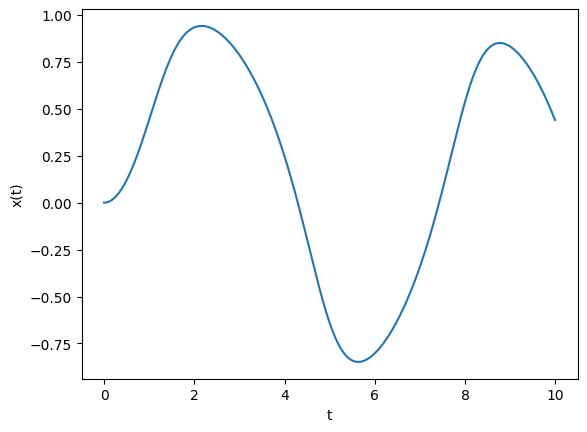

In [ ]:
def f(t,x):
    return -x**3 + np.sin(t)

tpoints, xpoints = EulerMethod(f, 0, 0, 10)
plt.plot(tpoints,xpoints)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

In [ ]:
## Rugga Kutta (explicit)
def RKexplicit(f, x0, t0, t1, A, b, c, N = 100):
  h = (t1-t0) / N
  tpoints = np.arange(t0,t1,h)
  xpoints = np.ones((N,1))
  xn = x0
  s = A.shape[0]
  k = np.zeros((s,1))
  for n, tn in enumerate(tpoints):
    xpoints[n] = xn
    k[0] = f(tn, xn)
    for i in range(s):
      k[i] = f(tn + c[i]*h, xn + h * A[i, 0:i].dot(k[0:i]))
    xn += h * b.dot(k)
  return tpoints, xpoints

In [ ]:
def f(t,x):
    return -x**3 + np.sin(t)

x0 = 0
t0 = 0
t1 = 10
## classical 4th order RK
A = np.eye(4, k = -1)
A[1,0] = 1/2
A[2,1] = 1/2
b = np.array([1/6, 1/3, 1/3, 1/6])
c = np.array([0, 0.5, 0.5, 1]).reshape(-1,1)
print(A)
print(b)
print(c)

[[0.  0.  0.  0. ]
 [0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  1.  0. ]]
[0.16666667 0.33333333 0.33333333 0.16666667]
[[0. ]
 [0.5]
 [0.5]
 [1. ]]


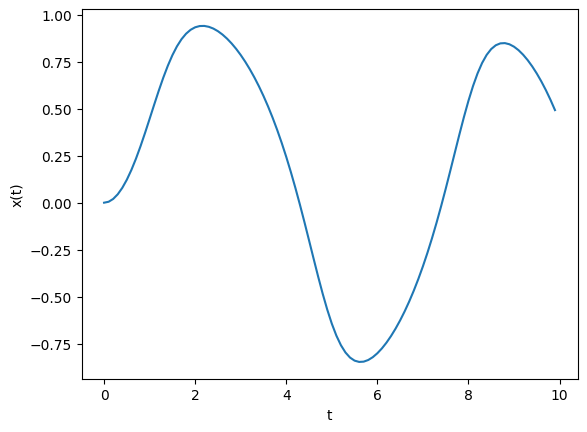

In [ ]:
tpoints, xpoints = RKexplicit(f, x0, t0, t1, A, b, c)
plt.plot(tpoints,xpoints)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

In [ ]:
## Rugga Kutta (embedded/adaptive)
def RKembedded(f, x0, t0, t1, A, b, c, b_low, N = 100):
  h = (t1-t0) / N
  tpoints = np.arange(t0,t1,h)
  xpoints = np.ones((N,1))
  err = np.ones_like(xpoints)
  xn = x0
  s = A.shape[0]
  k = np.zeros((s,1))
  for n, tn in enumerate(tpoints):
    xpoints[n] = xn
    k[0] = f(tn, xn)
    for i in range(s):
      k[i] = f(tn + c[i]*h, xn + h * A[i, 0:i].dot(k[0:i]))
    xn_low = xn + h * b_low.dot(k)
    xn = xn + h * b.dot(k)
    err[n] = xn - xn_low
  return tpoints, xpoints, err

In [ ]:
def f(t,x):
    return -x**3 + np.sin(t)

x0 = 0
t0 = 0
t1 = 10
## Fehlberg RK1(2)
A = np.zeros((3,3))
A[1,0] = 1/2
A[2,0:2] = [1/256, 255/256]
b = np.array([1/512, 255/256, 1/512])
b_low = np.array([1/256, 255/256, 0])
c = np.array([0, 0.5, 1]).reshape(-1,1)
print(A)
print(b)
print(b_low)
print(c)

[[0.         0.         0.        ]
 [0.5        0.         0.        ]
 [0.00390625 0.99609375 0.        ]]
[0.00195312 0.99609375 0.00195312]
[0.00390625 0.99609375 0.        ]
[[0. ]
 [0.5]
 [1. ]]


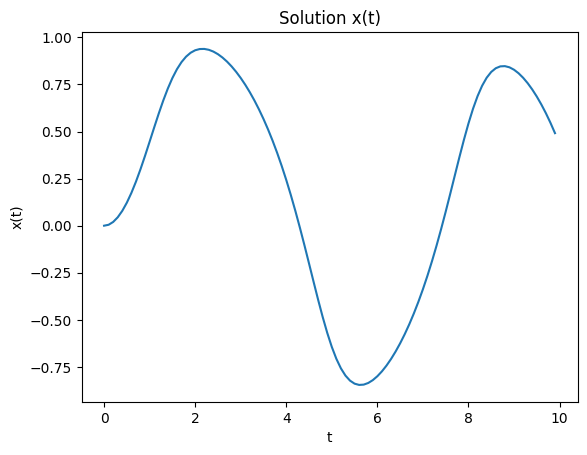

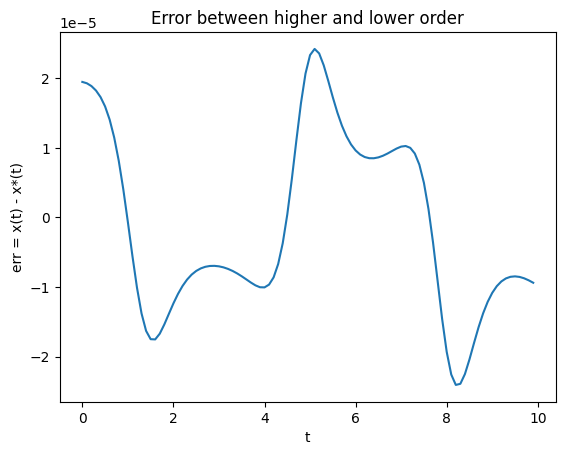

In [ ]:
tpoints, xpoints, err = RKembedded(f, x0, t0, t1, A, b, c, b_low)
plt.plot(tpoints,xpoints)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title('Solution x(t)')
plt.show()
plt.plot(tpoints, err)
plt.xlabel("t")
plt.ylabel("err = x(t) - x*(t)")
plt.title('Error between higher and lower order')
plt.show()

In [ ]:
def f(t,x):
    return -x**3 + np.sin(t)

x0 = 0
t0 = 0
t1 = 10
## Fehlberg RK45
A = np.zeros((6,6))
A[1,0] = 1/4
A[2,0:2] =  [3/32, 9/32]
A[3,0:3] = [1932/2197,-7200/2197,7296/2197]
A[4, 0:4] = [439/216,-8,3680/513,-845/4104]
A[5, 0:5] = [-8/27,2,-3544/2565,1859/4104,-11/40]
b = np.array([16/135,0,6656/12825,28561/56430,-9/50,2/55])
b_low = np.array([25/216,0,1408/2565,2197/4104,-1/5,0])
c = np.array([0, 1/4, 3/8, 12/13,1,1/2]).reshape(-1,1)
print(A)
print(b)
print(b_low)
print(c)

[[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.25        0.          0.          0.          0.          0.        ]
 [ 0.09375     0.28125     0.          0.          0.          0.        ]
 [ 0.87938097 -3.27719618  3.32089213  0.          0.          0.        ]
 [ 2.03240741 -8.          7.17348928 -0.20589669  0.          0.        ]
 [-0.2962963   2.         -1.38167641  0.45297271 -0.275       0.        ]]
[ 0.11851852  0.          0.51898635  0.50613149 -0.18        0.03636364]
[ 0.11574074  0.          0.54892788  0.53533138 -0.2         0.        ]
[[0.        ]
 [0.25      ]
 [0.375     ]
 [0.92307692]
 [1.        ]
 [0.5       ]]


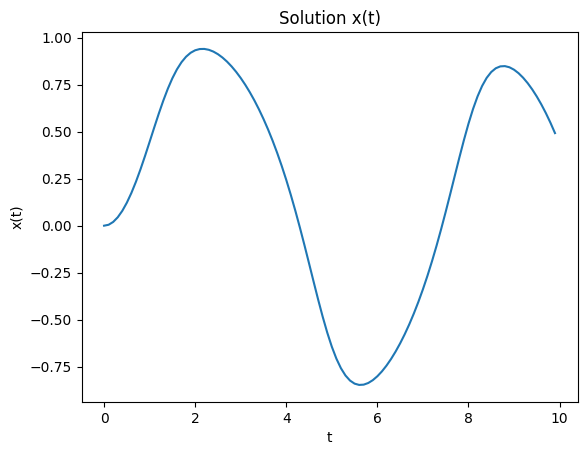

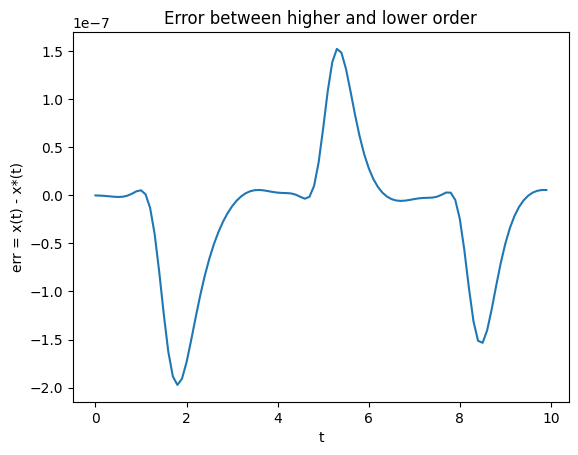

In [ ]:
tpoints, xpoints, err = RKembedded(f, x0, t0, t1, A, b, c, b_low)
plt.plot(tpoints,xpoints)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title('Solution x(t)')
plt.show()
plt.plot(tpoints, err)
plt.xlabel("t")
plt.ylabel("err = x(t) - x*(t)")
plt.title('Error between higher and lower order')
plt.show()

In [ ]:
def f(t,x):
    return -x**3 + np.sin(t)
x0 = 0
t0 = 0
t1 = 10
N = 100
tspan = [t0, t1]
t_eval = np.linspace(t0, t1, N)
# sol = scipy.integrate.solve_ivp(f, tspan, [x0], method = 'RK45')
sol = scipy.integrate.solve_ivp(f, tspan, [x0], method = 'RK45', t_eval = t_eval)
tpoints = sol.t
xpoints = sol.y[0]

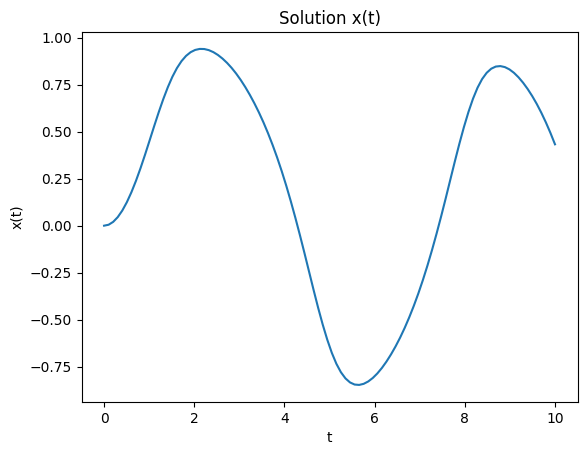

In [ ]:
plt.plot(tpoints,xpoints)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title('Solution x(t)')
plt.show()

### Multi-Step Methods

In [ ]:
## Adams Bashforth 5th order
def AdamsBashforth(f, x0, t0, t1, b, N = 100):
  h = (t1-t0) / N
  tpoints = np.arange(t0,t1,h)
  xpoints = np.ones((N,1))
  xn = x0
  s = b.size
  f_values = np.ones((N,1))
  xpoints[0] = xn
  f_values[0] = f(t0, xn)
  for i in range(1, s): ## to get initial values
    sol = scipy.integrate.solve_ivp(f, [tpoints[i-1], tpoints[i]], xpoints[i-1], method = 'RK45')
    xn += sol.y[0][-1]
    # t_temp, x_temp = EulerMethod(f, xpoints[i-1], tpoints[i-1], tpoints[i], N-1)
    # xn +=  x_temp[-1]
    xpoints[i] = xn
    # f_values[i] = f(t0 + i*h, xn)
    f_values[i] = f(tpoints[i], xn)
  b_inv = b[::-1]
  for i in range(s, N):
    xn += h * b_inv.dot(f_values[i-5:i])
    xpoints[i] = xn
    f_values[i] = f(tpoints[i], xn)
  return tpoints, xpoints

In [ ]:
def f(t,x):
    return -x**3 + np.sin(t)

x0 = 0
t0 = 0
t1 = 10
b = np.array([1901, -2774, 2616, -1274, 251])/720
print(b)

[ 2.64027778 -3.85277778  3.63333333 -1.76944444  0.34861111]


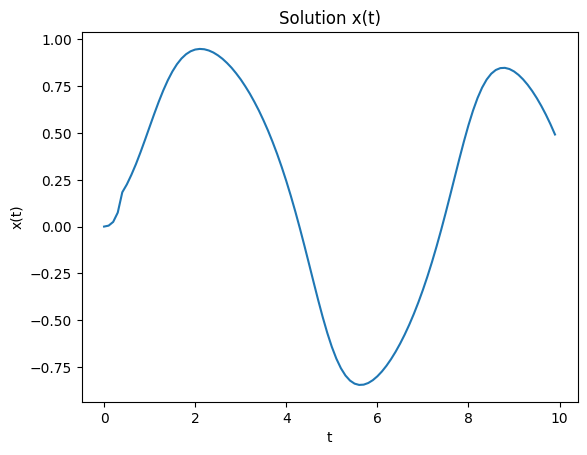

In [ ]:
tpoints, xpoints = AdamsBashforth(f, x0, t0, t1, b)
plt.plot(tpoints,xpoints)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title('Solution x(t)')
plt.show()

In [ ]:
## Adams Bashforth (order 2)
def AdamsBashforth2(f, x0, t0, t1, b, N = 100):
  h = (t1-t0) / N
  tpoints = np.arange(t0,t1,h)
  xpoints = np.ones((N,1))
  xn = x0
  s = b.size
  xpoints[0] = xn
  fn = f(tpoints[0], xn)
  xn += h * fn ## Euler method to get next value to start AB order 2
  xpoints[1] = xn
  for i in range(2, N):
    fn1 = f(tpoints[i-1], xn)
    xn += h*(b[0]*fn1 + b[1]*fn)
    xpoints[i] = xn
    fn = fn1
  return tpoints, xpoints

In [ ]:
def f(t,x):
    return -x**3 + np.sin(t)

x0 = 0
t0 = 0
t1 = 10
b = np.array([3/2, -1/2])
print(b)

[ 1.5 -0.5]


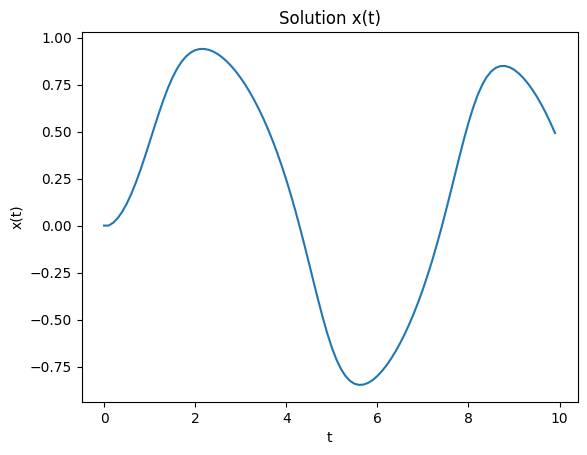

In [ ]:
tpoints, xpoints = AdamsBashforth2(f, x0, t0, t1, b)
plt.plot(tpoints,xpoints)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title('Solution x(t)')
plt.show()

In [ ]:
## Adams Moulton (order 2) aka trapezoidal rule
## use predictor-corrector method to calculate implicit value
def AdamsMoulton2(f, x0, t0, t1, b_exp, b_imp, N = 100):
  h = (t1-t0) / N
  tpoints = np.arange(t0,t1,h)
  xpoints = np.ones((N,1))
  xn = x0
  s = b.size
  xpoints[0] = xn
  fn = f(tpoints[0], xn)
  xn += h * fn ## Euler method to get next value to start AB order 2
  xpoints[1] = xn
  fn1 = f(tpoints[1], xn)
  for i in range(2, N):
    xn_bar = xn + h*(b_exp[0]*fn1 + b_exp[1]*fn)  ## AdamsBashforth order 2
    xn += h*(b_imp[0]*f(tpoints[i], xn_bar) + b_imp[1]*fn1)  ## AdamsMoulton ord 2
    xpoints[i] = xn
    fn = fn1
    fn1 = f(tpoints[i], xn)
  return tpoints, xpoints

In [ ]:
def f(t,x):
    return -x**3 + np.sin(t)

x0 = 0
t0 = 0
t1 = 10
b_exp = np.array([3/2, -1/2])
b_imp = np.array([1/2, 1/2])
print(b_exp)
print(b_imp)

[ 1.5 -0.5]
[0.5 0.5]


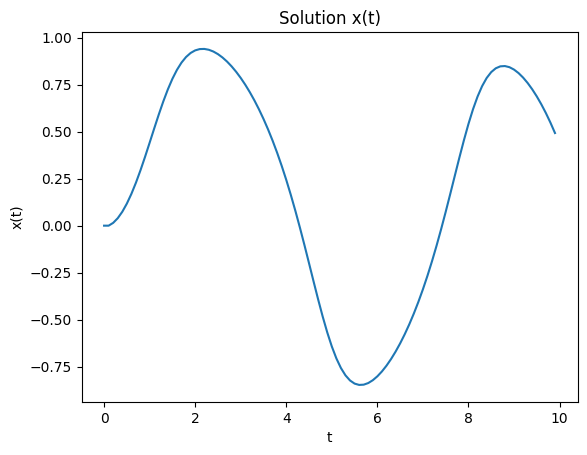

In [ ]:
tpoints, xpoints = AdamsMoulton2(f, x0, t0, t1, b_exp, b_imp)
plt.plot(tpoints,xpoints)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title('Solution x(t)')
plt.show()

In [ ]:
## Backwards Differentiation Formula: BDF (order 2)
## use predictor-corrector method to calculate implicit value
def BDF2(f, x0, t0, t1, b_exp, a, b, N = 100):
  h = (t1-t0) / N
  tpoints = np.arange(t0,t1,h)
  xpoints = np.ones((N,1))
  xn = x0
  xpoints[0] = xn
  fn = f(tpoints[0], xn)
  xn += h * fn ## Euler method to get next value to start AB order 2
  xpoints[1] = xn
  fn1 = f(tpoints[1], xn)
  for i in range(2, N):
    xn_bar = xn + h*(b_exp[0]*fn1 + b_exp[1]*fn)  ## AdamsBashforth order 2
    xn = h*(b[0]*f(tpoints[i], xn_bar)) - a.dot(xpoints[i-2:i])  ## BDF2
    xpoints[i] = xn
    fn = fn1
    fn1 = f(tpoints[i], xn)
  return tpoints, xpoints

In [ ]:
def f(t,x):
    return -x**3 + np.sin(t)

x0 = 0
t0 = 0
t1 = 10
b_exp = np.array([3/2, -1/2])
a = np.array([1/3, -4/3])
b = np.array([2/3])
print(b_exp)
print(a)
print(b)

[ 1.5 -0.5]
[ 0.33333333 -1.33333333]
[0.66666667]


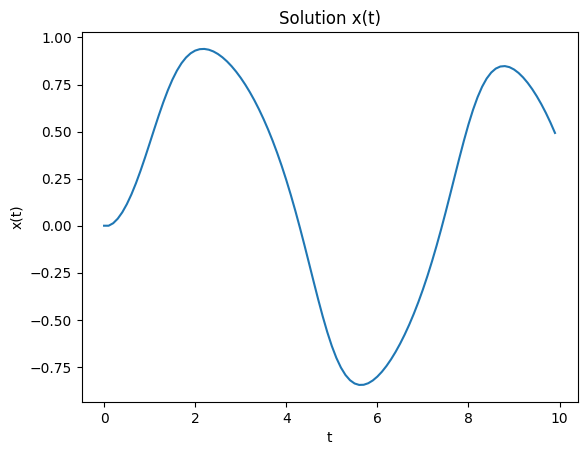

In [ ]:
tpoints, xpoints = BDF2(f, x0, t0, t1, b_exp, a,b)
plt.plot(tpoints,xpoints)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title('Solution x(t)')
plt.show()

### System of ODEs

$$
\begin{cases}
\sin(t) y''' + \cos(ty) + \sin(t^2 + y'') + (y')^3 = \log(t) \\
y(2) = 7 \\
y'(2) = 3 \\
y '' (2) = -4
\end{cases}
$$

$$
x_1 = y, x_2 = y', x_3 = y''
$$
$$
\begin{cases}
x_1 ' = x_2 \\
x_2 ' = x_3 \\
x_3 ' = (\log(t) - x_2^3 - \sin(t^2 + x_3) - \cos(tx_1)) / \sin(t)
\end{cases}
$$

In [ ]:
def f(t, x):
  return [x[1], x[2], (np.log(t) - x[1]**3 - np.sin(t**2 + x[2]) - np.cos(t*x[0])) / np.sin(t)]
t0 = 2
t1 = 2.5
x0 = [7,3,-4]
sol = scipy.integrate.solve_ivp(f, [t0, t1], x0)

In [ ]:
sol.y.shape

(3, 5)

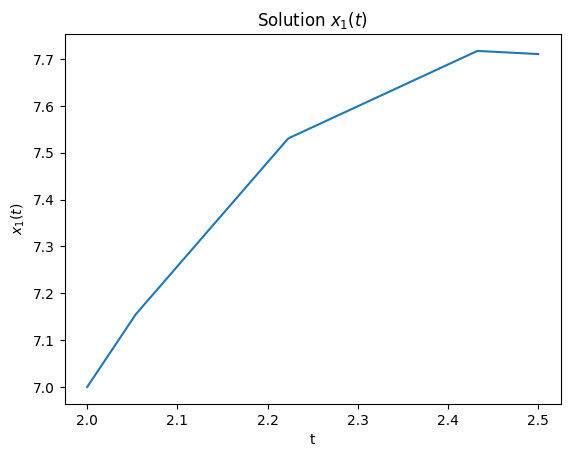

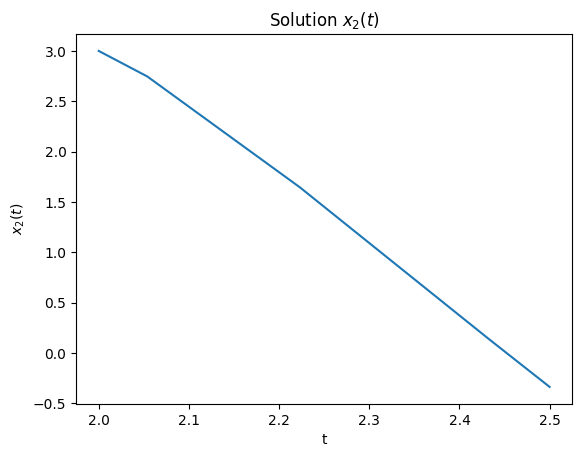

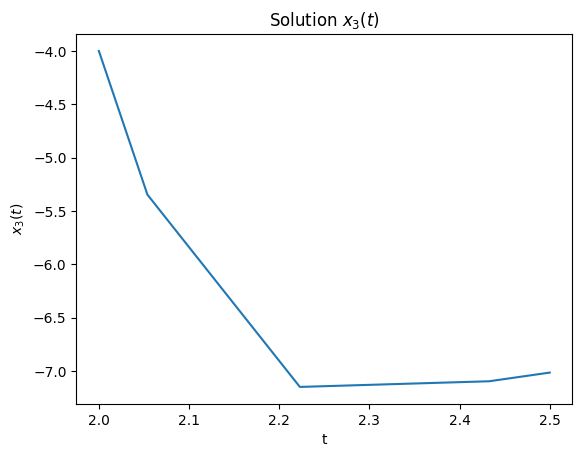

In [ ]:
tpoints = sol.t
for i in range(sol.y.shape[0]):
  plt.plot(tpoints, sol.y[i])
  plt.xlabel("t")
  plt.ylabel(f"$x_{i+1}(t)$")
  plt.title(f'Solution $x_{i+1}(t)$')
  plt.show()

### Shooting Method

We start with the boundary value problem (BVP)
$$
\begin{cases}
y ''  = f(t, y, y') \\
y(t_0) = c, y(t_1) = d.
\end{cases}
$$
We convert it to the IVP
$$
\begin{cases}
y ''  = f(t, y, y') \\
y(t_0) = c, y'(t_0) = s
\end{cases}
$$
where $s$ is a parameter and we denote the solution as $y(t;s)$.

We define $g(s) = y(t_1;s) - d$. For $s$ where $g(s) = 0$ gives $y$ the correct boundary value and therefore the solution we require.

We can find the root of $g$ via Newton's method, but we need to compute $g'$. To do so, let
$z(t;s) = \frac{\partial y(t;s)}{\partial s}$. Then we have the IVP
$$
\begin{cases}
z'' = \frac{\partial f}{\partial y} z  + \frac{\partial f}{\partial y'} z' \\
z(t_0;s) = 0, z'(t_0;s) = 1.
\end{cases}
$$
Thus, $g'(s) = z(t_1;s)$.

In [ ]:
# def f(t,y):
#   return [y[1], 2*y[0]**3 - 6*y[0] - 2*t**3, y[3], (6*y[0] - 6)*y[2]]
# t0 = 1
# t1 = 2
# s = 1/10 ## guess to initiate
# c, d = 2, 5/2
# tspan = [t0, t1]
# bspan = [c,d]
# y0 = [bspan[0], s, 0 , 1]

$$
\begin{cases}
y ''  = y' + y \\
y(0) = 0, y(1) = 2.
\end{cases}
$$

In [ ]:
def f(t,y):
  return [y[1], y[0] + y[1], y[3], y[2] + y[3]]
t0 = 0
t1 = 1
s = 2   ## guess to initiate
c, d = 0, 2
tspan = [t0, t1]
bspan = [c,d]
y0 = [bspan[0], s, 0 , 1]

In [ ]:
def shootingMethod(f, tspan, bspan, s, M_iters = 10, tol = 10 ** -5):
  for _ in range(M_iters):
    y0 = [bspan[0], s, 0 , 1]
    sol = scipy.integrate.solve_ivp(f, tspan, y0)
    s_prev = s
    s = s - (sol.y[0][-1] - bspan[1]) / sol.y[2][-1]  ## Netwon Method
    if abs(s - s_prev) < tol or abs(sol.y[0][-1] - bspan[1]) < tol:
      return sol
  # return sol
  raise Exception('Method Failed: Reach Max Iteration Value')

In [ ]:
sol = shootingMethod(f, tspan, bspan, s)

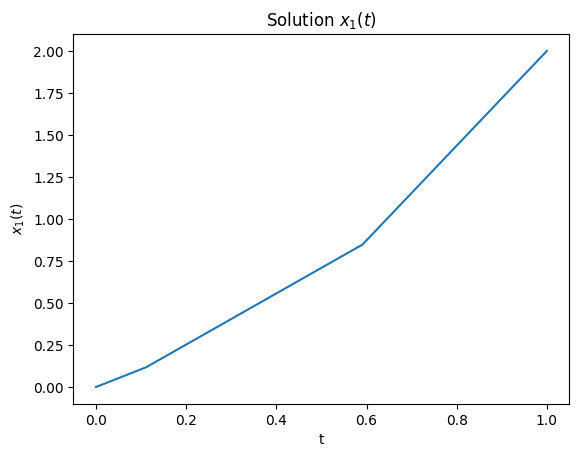

In [ ]:
tpoints = sol.t
# for i in range(sol.y.shape[0]):
#   plt.plot(tpoints, sol.y[i])
#   plt.xlabel("t")
#   plt.ylabel(f"$x_{i+1}(t)$")
#   plt.title(f'Solution $x_{i+1}(t)$')
#   plt.show()
i = 0
plt.plot(tpoints, sol.y[i])
plt.xlabel("t")
plt.ylabel(f"$x_{i+1}(t)$")
plt.title(f'Solution $x_{i+1}(t)$')
plt.show()

In [ ]:
# scipy.integrate.solve_bvp()

### Finite Difference Method

Consider the BVP
$$
\begin{cases}
y ''  = -4y + 4t \\
y(0) = 0, y'(\pi / 2) = 0.
\end{cases}
$$
We use the symmetric difference $y'' =  (y_{i+1} - 2y_{i} + y_{i-1}) / h^2$
and the central difference $y ' = (y_{i+1} - y_{i-1}) / (2h)$ to derive a matrix equation solve it.

We obtain the following equations:
$$
\begin{cases}
y_0 = 0 \\
y_{i-1} + (4h^2 - 2)y_i + y_{i+1} = 4h^2 t_i  
\quad i = 1, \ldots, n \\
y_{n-1} = y_{n+1}.
\end{cases}
$$

Combining the second and third equations for $i = n$,
$$
\begin{cases}
y_0 = 0 \\
y_{i-1} + (4h^2 - 2)y_i + y_{i+1} = 4h^2 t_i  
\quad i = 1, \ldots, n-1 \\
2y_{n-1} + (4h^2 - 2)y_n  = 4h^2 t_n .
\end{cases}
$$

In [ ]:
def finiteDifferenceMethod(t0, t1, N = 100):
  h = (t1 - t0) / N
  tpoints = np.arange(t0, t1, h)
  # A = np.zeros((N,N))
  # A[0,0] = 1
  # for i in range(1, n-1):
  #   A[i, i-1] = 1
  #   A[i, i] = 4 * h**2 - 2
  #   A[i, i+1] = 1
  # A[n-1, n-2] = 2
  # A[n-1, n-1] = 4 * h**2 - 2
  A = np.eye(N, k = 0) * (4 * h**2 - 2) + np.eye(N, k = -1) + np.eye(N, k = 1)
  A[-1, -2] = 2
  b = tpoints * 4 * h**2
  ypoints = np.linalg.solve(A, b)
  return tpoints, ypoints

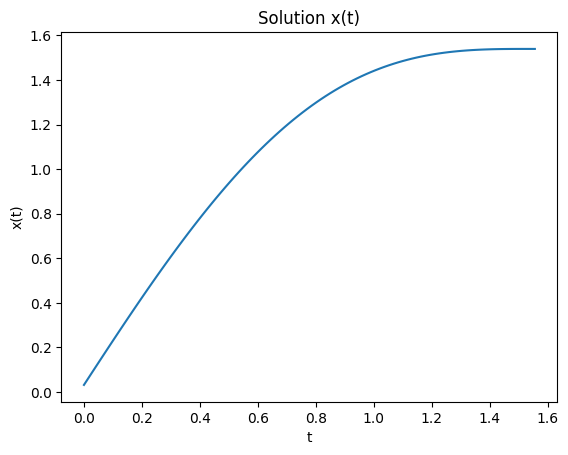

In [ ]:
t0, t1 = 0, np.pi / 2
tpoints, xpoints = finiteDifferenceMethod(t0, t1)
plt.plot(tpoints,xpoints)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title('Solution x(t)')
plt.show()

## Numerical Solution to PDEs

### Parabolic PDEs

Observe the heat equation:
$$
\begin{cases}
u_{xx} = u_t, \quad t \geq 0, 0 \leq x \leq 1, \\
u(x,0) = g(x), \\
u(0, t) = a(t), \\
u(1,t) = b(t).
\end{cases}
$$

In [ ]:
## finite difference method (explicit)
def fdePDE(g, a, b, t0 = 0, tf = 1, x0 = 0, xf = 10, Nx = 100, Nt = 1000):
  dx = (xf - x0) / Nx
  dt = (tf - t0) / Nt

  s = dt / dx**2
  if s > 1 / 2:
    raise ValueError("The time step is too large for stability.")

  x = np.linspace(x0, xf, Nx+1)
  w = np.sin(np.pi * x)
  # x = np.arange(x0, xf, dx)
  # w = np.array([np.sin(np.pi*i*dx) for i in range(Nx)])
  v = np.zeros_like(w)
  for j in range(Nt):
    v[0] = a(j*dt)
    v[-1] = b(j*dt)
    for i in range(1, Nx):
      v[i] =  s*w[i + 1] + (1- 2*s) * w[i] + s*w[i - 1]
    w[:] = v[:]
  return x, w

In [ ]:
def g(x):
  return np.sin(np.pi * x)
def a(t):
  return 0
def b(t):
  return 0
def f(x,t):
  return np.exp(-np.pi**2 *t) * np.sin(np.pi*x)

x0 = 0
xf = 10
t0 = 0
tf = 1
Nx = 100
Nt = 1000
xpoints, ypoints = fdePDE(g, a, b, t0 = t0, tf = tf, x0 = x0, xf = xf, Nx = Nx, Nt = Nt)

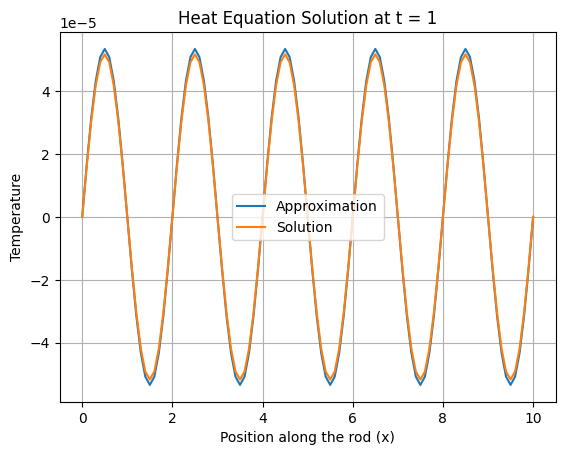

In [ ]:
plt.plot(xpoints, ypoints, label='Approximation')
plt.plot(xpoints, f(xpoints, 1), label = 'Solution')
plt.xlabel('Position along the rod (x)')
plt.ylabel('Temperature')
plt.title(f'Heat Equation Solution at t = {tf}')
plt.legend()
plt.grid()
plt.show()

In [ ]:
## finite difference method (implicit)
def fdiPDE(g, a, b, t0 = 0, tf = 1, x0 = 0, xf = 10, Nx = 100, Nt = 1000):
  dx = (xf - x0) / Nx
  dt = (tf - t0) / Nt

  s = dt / dx**2
  if s > 1 / 2:
      raise ValueError("The time step is too large for stability.")

  x = np.linspace(x0, xf, Nx+1)
  w = np.sin(np.pi * x)
  # x = np.arange(x0, xf, dx)
  # w = np.array([np.sin(np.pi*i*dx) for i in range(Nx)])

  A = np.eye(Nx+1, k = 0) * (1+2*s) - s* np.eye(Nx+1, k = -1) - s*np.eye(Nx+1, k = 1)
  A[0, 0] = 1
  A[0, 1] = 0
  A[-1, -1] = 1
  A[-1, -2] = 0
  for _ in range(Nt):
    w = np.linalg.solve(A, w)
  return x, w

In [ ]:
def g(x):
  return np.sin(np.pi * x)
def a(t):
  return 0
def b(t):
  return 0
def f(x,t):
  return np.exp(-np.pi**2 *t) * np.sin(np.pi*x)


x0 = 0
xf = 10
t0 = 0
tf = 1
Nx = 100
Nt = 1000
xpoints, ypoints = fdiPDE(g, a, b, t0 = t0, tf = tf, x0 = x0, xf = xf, Nx = Nx, Nt = Nt)

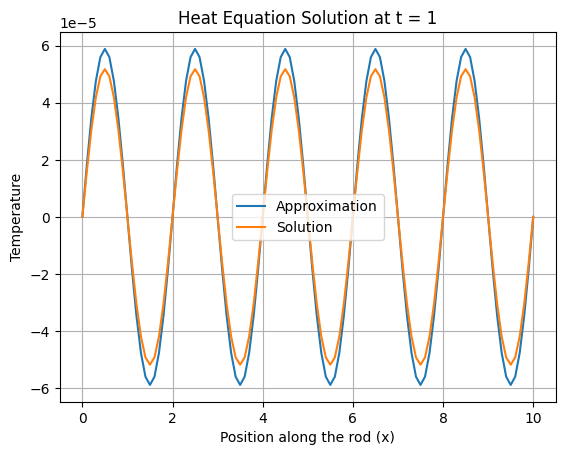

In [ ]:
plt.plot(xpoints, ypoints, label='Approximation')
plt.plot(xpoints, f(xpoints, 1), label = 'Solution')
plt.xlabel('Position along the rod (x)')
plt.ylabel('Temperature')
plt.title(f'Heat Equation Solution at t = {tf}')
plt.legend()
plt.grid()
plt.show()

## Machine Learning

Using the sklearn module has many machine learning methods done more efficiently. See tensorflow or keras for neural networks. Below is some basic algorithms without using the modules above.

In [ ]:
## Linear Regression
## might want to add regularization later:
## ridge (L2 norm on weights) or lasso (L1 norm on weights)
class LinearRegression:
    def __init__(self, method='gradient_descent', learning_rate=0.01, num_iterations=1000):
        self.method = method
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.coef = None
        self.scaler = sklearn.preprocessing.StandardScaler() ## mean 0, variance 1

    def fit(self, X, y):
        X = self.scaler.fit_transform(X)
        X_b = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

        if self.method == 'normal_equation':
            self.coef =  scipy.linalg.solve(X_b.T.dot(X_b), X_b.Tdot(y))
        elif self.method == 'gradient_descent':
            self.coef = np.zeros(X_b.shape[1])
            for _ in range(self.num_iterations):
                predictions = X_b.dot(self.coef)
                errors = predictions - y
                gradient = X_b.T.dot(errors) / y.size
                self.coef -= self.learning_rate * gradient   # Gradient Descent

    def predict(self, X):
        X = self.scaler.transform(X)
        X_b = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        return X_b.dot(self.coef)

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)


In [ ]:
X = np.array([[1, 2], [2, 3], [3, 5], [4, 7], [5, 11]])
y = np.array([2, 3, 5, 7, 11])

method = 'gradient_descent'

model = LinearRegression(method=method, learning_rate=0.01, num_iterations=1000)
model.fit(X, y)

y_pred = model.predict(X)
mse = model.mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.08152941005840167


In [ ]:
## Logistic Regression
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.scaler = sklearn.preprocessing.StandardScaler() ## mean 0, variance 1

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = self.scaler.fit_transform(X)
        M, N = X.shape ## M is num of samples, N is num of features
        self.weights = np.zeros(N)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            dw = (1 / M) * np.dot(X.T, (y_predicted - y))
            db = (1 / M) * np.sum(y_predicted - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        X = self.scaler.transform(X)
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)

    def log_loss(self, X, y):
        M, N = X.shape
        y_hat  = self.sigmoid(np.dot(X, self.weights) + self.bias)
        return -np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))/ M

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)


In [ ]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([0, 0, 0, 1])

model = LogisticRegression(learning_rate=0.1, num_iterations=1000)
model.fit(X, y)

predictions = model.predict(X)
print("Predictions:", predictions)

acc = model.accuracy(y, predictions)
print("Accuracy:", acc)

Predictions: [0 0 0 1]
Accuracy: 1.0


In [ ]:
## knn
class KNN:
    def __init__(self, k=3, norm_order = None):
        self.k = k
        self.norm_order = norm_order  ## matrix: frobius, vector: 2-norm

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self.knn_predict(x) for x in X]
        return np.array(predictions)

    def knn_predict(self, x):
        distances = np.linalg.norm(self.X_train - x, ord = self.norm_order, axis=1)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        label_count = dict()
        for label in k_nearest_labels:
          label_count[label] = label_count.get(label, 0) + 1

        most_common_label = max(label_count, key=label_count.get)
        return most_common_label

    def accuracy(self, X_test, y_test):
        predictions = self.predict(X_test)
        accuracy = np.mean(predictions == y_test)
        return accuracy

In [ ]:
X_train = np.array([[1, 2], [2, 3], [3, 1], [6, 5], [7, 7], [8, 6]])
y_train = np.array([0, 0, 0, 1, 1, 1])

knn = KNN(k=3)
knn.fit(X_train, y_train)

X_test = np.array([[1, 1], [5, 5], [8, 5]])
y_test = np.array([0, 1, 1])

predictions = knn.predict(X_test)
print("Predictions:", predictions)

accuracy = knn.accuracy(X_test, y_test)
print("Accuracy:", accuracy)

Predictions: [0 1 1]
Accuracy: 1.0


In [ ]:
## k-means
class KMeans:
    def __init__(self, n_clusters=3, norm_order = None, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
        self.labels = None
        self.norm_order = norm_order  ## matrix: frobius, vector: 2-norm

    def fit(self, X):
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]
        for i in range(self.max_iter):
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, ord = self.norm_order, axis=2)
            self.labels = np.argmin(distances, axis=1)
            new_centroids = np.array([X[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])

            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def fit_predict(self, X):
        self.fit(X)
        return self.labels


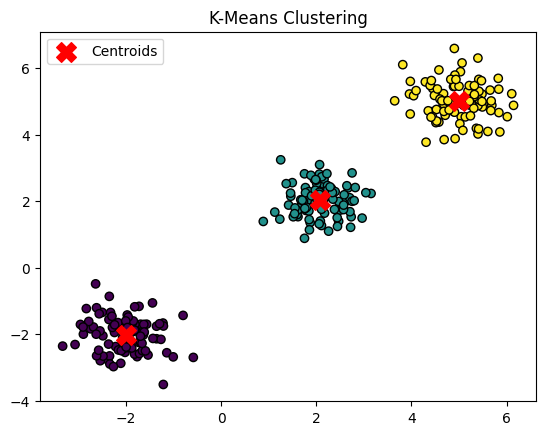

In [ ]:
# np.random.seed(42)
X = np.concatenate([
    np.random.normal(loc=-2, scale=0.5, size=(100, 2)),
    np.random.normal(loc=2, scale=0.5, size=(100, 2)),
    np.random.normal(loc=5, scale=0.5, size=(100, 2))
], axis = 0)


kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [ ]:
## svm (linear kernel, binary classification)
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, regularization_strength=1.0, num_iterations=1000):
        self.learning_rate = learning_rate
        self.regularization_strength = regularization_strength
        self.num_iterations = num_iterations
        self.W = None  ## weights
        self.b = None  ## bias

    def fit(self, X, y):
        M, N = X.shape  ## num_samples, num_features
        self.W = np.zeros(N)
        self.b = 0

        y = np.where(y <= 0, -1, 1)

        # Gradient descent
        for _ in range(self.num_iterations):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.W) - self.b) >= 1
                if condition:
                    dw = 2 * self.regularization_strength * self.W
                    db = 0
                else:
                    dw = 2 * self.regularization_strength * self.W - np.dot(x_i, y[idx])
                    db = y[idx]
                self.W -= self.learning_rate * dw
                self.b -= self.learning_rate * db

    def predict(self, X):
        approx = np.dot(X, self.W) - self.b
        return np.sign(approx)


In [ ]:
X = np.array([[1, 2], [2, 3], [3, 3], [5, 1], [6, 2], [7, 3]])
y = np.array([1, 1, 1, -1, -1, -1])
svm = SVM(learning_rate=0.01, regularization_strength=0.1, num_iterations=1000)
svm.fit(X, y)
predictions = svm.predict(X)
print("Predictions:", predictions)

Predictions: [ 1.  1.  1. -1. -1. -1.]


# End